In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams, pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.switch_backend('qt5agg')

Our world is full of beauty, order and chaos. Chaos is a strange topic for math, which is a deterministic subject, but we can describe and create chaotic systems with surprisingly simple equations. The Lorenz system is perhaps the best known chaotic system.
## The Lorenz System
One of the first examples of a chaotic system was discovered by Edward Lorenz, which is now known as the Lorenz system.
Edward Lorenz was attempting to develop a simplified model of weather systems using differential equations, and after much simplification, he arrived at this set of equations:
$$\begin{align}
\frac{\partial x}{\partial t} &= \sigma (y-x) \\
\frac{\partial x}{\partial t} &= \rho x - y - xz \\
\frac{\partial x}{\partial t} &= xy - \beta z  \\
\end{align}$$
where $\sigma$, $\rho$, and $\beta$ are all constants. When these constants are chosen appropriately, the system will demonstrate a type of chaotic behavior. It will not tend toward any one point, but rather it will tend toward the two spirals which are called the basins of attraction.

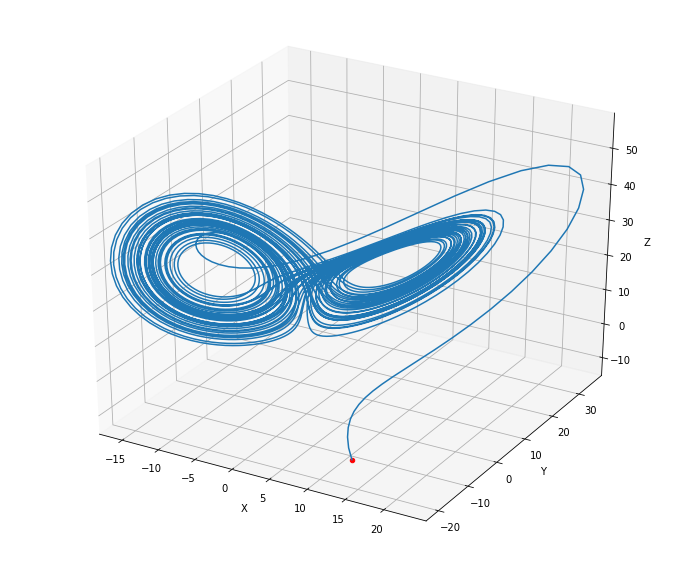

In [21]:
def lorenz_ode(inputs, T):
    x, y, z = inputs
    Xprime = sigma*(y - x)
    Yprime = rho*x - y - x*z
    Zprime = x*y - beta*z
    return Xprime, Yprime, Zprime

def solve_lorenz(init_cond, time=10, atol=1e-10, rtol=1e-10):
    '''
    Use odeint in conjuction with lorenz_ode and the time interval T
    To get the X, Y, and Z values for this system.
    You will need to transpose the output of odeint to graph it correctly.
    '''
    T = np.linspace(0, time, time*100)
    sol = odeint(lorenz_ode, init_cond, T, atol=atol, rtol=rtol)

    X,Y,Z = sol.T
    X.reshape(-1)
    Y.reshape(-1)
    Z.reshape(-1)
    
    return X,Y,Z

sigma = 10
rho = 28
beta = 8/3

init_cond = (np.random.random(3) - 0.5)*30
X, Y, Z = solve_lorenz(init_cond, 50)
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
ax.scatter(X[0], Y[0], Z[0], c='red')
ax.plot( X, Y, Z ) #Make sure X, Y, Z are same length.
#Connect points (X[i], Y[i], Z[i]) for i in len(X)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim3d([min(X), max(X)]) #Bounds the axes nicely
ax.set_ylim3d([min(Y), max(Y)])
ax.set_zlim3d([min(Z), max(Z)])
plt.show()


## Problem 2

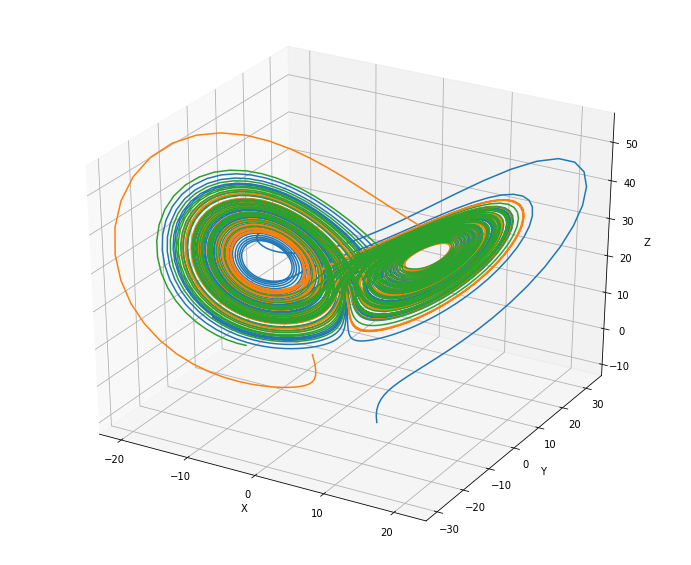

In [3]:
n = 3
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')

X_max = 0
Y_max = 0
Z_max = 0
X_min = 0
Y_min = 0
Z_min = 0

for _ in range(n):
    init_cond = (np.random.random(3) - 0.5)*30
    X, Y, Z = solve_lorenz(init_cond, 50)
    ax.plot( X, Y, Z ) #Make sure X, Y, Z are same length.
    #Connect points (X[i], Y[i], Z[i]) for i in len(X)
    X_max = max(X_max,max(X))
    Y_max = max(Y_max,max(Y))
    Z_max = max(Z_max,max(Z))
    X_min = min(X_min,min(X))
    Y_min = min(Y_min,min(Y))
    Z_min = min(Z_min,min(Z))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim3d([X_min, X_max]) #Bounds the axes nicely
ax.set_ylim3d([Y_min, Y_max])
ax.set_zlim3d([Z_min, Z_max])
plt.show()


## Problem 3

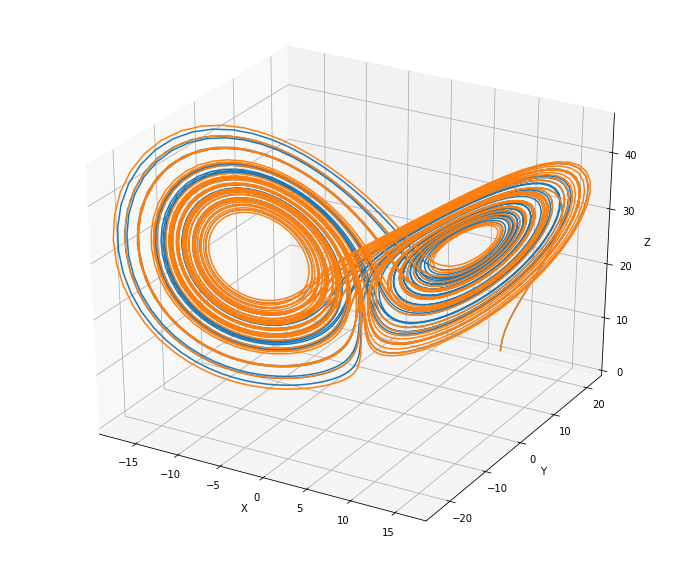

In [8]:
n = 2
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')

X_max = 0
Y_max = 0
Z_max = 0
X_min = 0
Y_min = 0
Z_min = 0

for i in range(n):
    if i == 0:
        init_cond = (np.random.random(3) - 0.5)*30
    else:
        init_cond += np.random.randn(3)*(1e-10)
    X, Y, Z = solve_lorenz(init_cond, 50)
    ax.plot( X, Y, Z ) #Make sure X, Y, Z are same length.
    #Connect points (X[i], Y[i], Z[i]) for i in len(X)
    X_max = max(X_max,max(X))
    Y_max = max(Y_max,max(Y))
    Z_max = max(Z_max,max(Z))
    X_min = min(X_min,min(X))
    Y_min = min(Y_min,min(Y))
    Z_min = min(Z_min,min(Z))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim3d([X_min, X_max]) #Bounds the axes nicely
ax.set_ylim3d([Y_min, Y_max])
ax.set_zlim3d([Z_min, Z_max])
plt.show()

## Problem 4

In [9]:
from matplotlib.animation import FuncAnimation

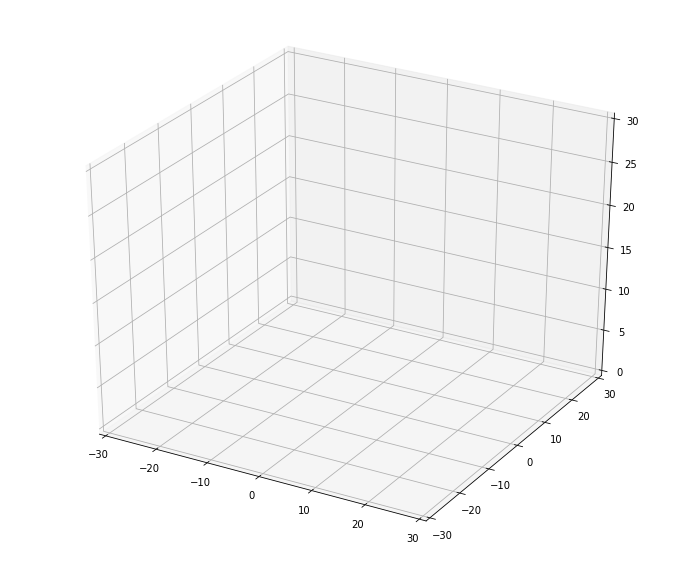

In [10]:
def lorenz_sensitive():
    #Calculate the data to be animated
    init_cond = (np.random.random(3) - 0.5)*30
    X1, Y1, Z1 = solve_lorenz(init_cond, 50)
        
    init_cond += np.random.randn(3)*(1e-10)
    X2, Y2, Z2 = solve_lorenz(init_cond, 50)

    #Create a figure and set the window boundaries
    fig = plt.figure(figsize=(12,10))
    ax = fig.gca(projection='3d')
    ax.set_xlim3d([-30, 30])
    ax.set_ylim3d([-30,30])
    ax.set_zlim3d([0,30])
    
    
    #Initiate empty lines of the correct dimension
    lorenz1, = plt.plot([], [], [])
    lorenz2, = plt.plot([], [], []) #note the comma after the variable name
    
    #Define a function that updates each line
    def update(index):
        lorenz1.set_data(X1[:index], Y1[:index])
        lorenz2.set_data(X2[:index], Y2[:index])
        lorenz1.set_3d_properties(Z1[:index])
        lorenz2.set_3d_properties(Z2[:index])
        return lorenz1, lorenz2,
    
    a = FuncAnimation(fig, update, frames=len(X1), interval=1)
    plt.show()
lorenz_sensitive()

In [23]:
from IPython.display import HTML

HTML("""
<video width="320" height="240" controls>
  <source src="path/to/your.mp4" type="video/mp4">
</video>
""")

## Problem 5

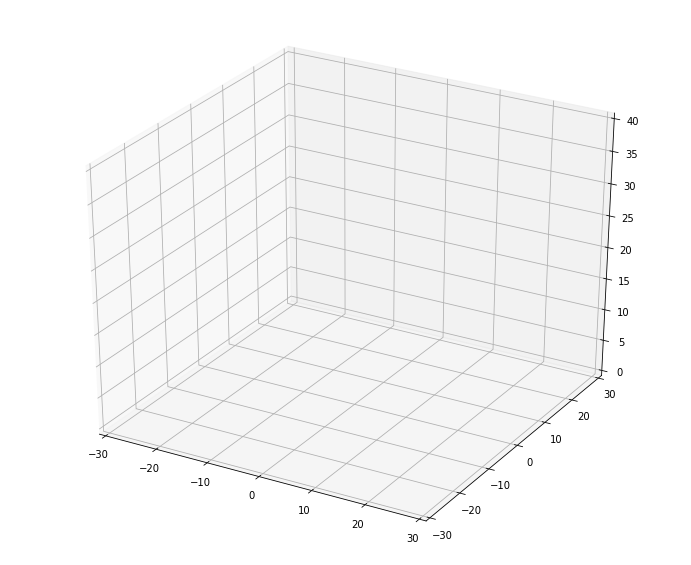

In [11]:
def lorenz_sensitive():
    #Calculate the data to be animated
    init_cond = (np.random.random(3) - 0.5)*30
    X1, Y1, Z1 = solve_lorenz(init_cond, 50, atol=1e-14, rtol=1e-12)
    X2, Y2, Z2 = solve_lorenz(init_cond, 50, atol=1e-15, rtol=1e-13)

    #Create a figure and set the window boundaries
    fig = plt.figure(figsize=(12,10))
    ax = fig.gca(projection='3d')
    ax.set_xlim3d([-30, 30])
    ax.set_ylim3d([-30,30])
    ax.set_zlim3d([0,40])
    
    
    #Initiate empty lines of the correct dimension
    lorenz1, = plt.plot([], [], [])
    lorenz2, = plt.plot([], [], []) #note the comma after the variable name
    
    #Define a function that updates each line
    def update(index):
        lorenz1.set_data(X1[:index], Y1[:index])
        lorenz2.set_data(X2[:index], Y2[:index])
        lorenz1.set_3d_properties(Z1[:index])
        lorenz2.set_3d_properties(Z2[:index])
        return lorenz1, lorenz2,
    
    a = FuncAnimation(fig, update, frames=len(X1), interval=0.25)
    plt.show()
lorenz_sensitive()

## Problem 6

In [12]:
from scipy import linalg as la
from scipy.stats import linregress

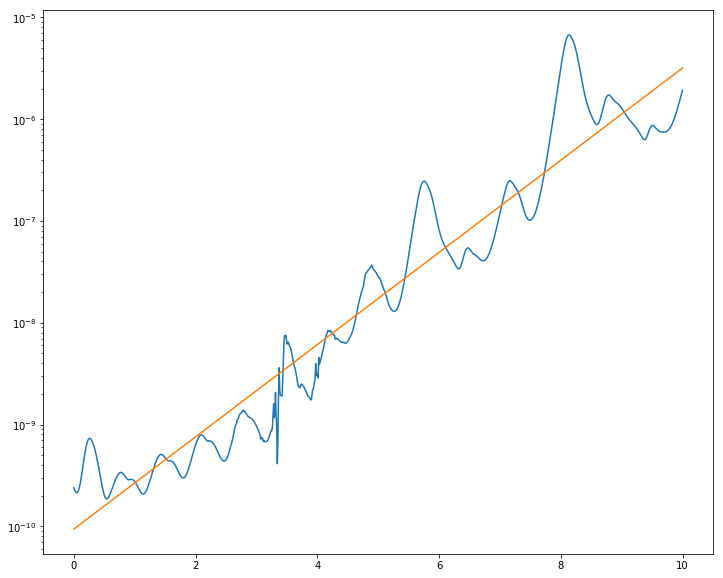

lambda = 1.0431061791021876


In [13]:
fig = plt.figure(figsize=(12,10))
#ax = fig.gca(projection='3d')

X_max = 0
Y_max = 0
Z_max = 0
X_min = 0
Y_min = 0
Z_min = 0

#T = np.linspace(0, time, time*100)
init_cond = (np.random.random(3) - 0.5)*30
X, Y, Z = solve_lorenz(init_cond, 50)
init_cond = np.array([X[-1],Y[-1],Z[-1]])
X1, Y1, Z1 = solve_lorenz(init_cond, 10)
init_cond += np.random.randn(3)*1e-10
X2, Y2, Z2 = solve_lorenz(init_cond, 10)

er = []
x = np.linspace(0,10,len(X1))
for i in range(len(X1)):
    er.append(la.norm(np.array([X1[i]-X2[i],Y1[i]-Y2[i],Z1[i]-Z2[i]])))
plt.semilogy(x,er)
m, b = linregress(x, np.log(er))[:2]
plt.semilogy(x, np.exp(m*x+b))
plt.show()
print("lambda =", m)